In [77]:
import pandas as pd

In [78]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [80]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [81]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [82]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [83]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [84]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [85]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

titanic_df['Age']= imputer.fit_transform(titanic_df[['Age']])


In [86]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [87]:
features = ['Pclass', 'Sex_male', 'Sex_female', 'Age', 'SibSp', 'Parch', 'Fare']
X = titanic_df[features]
y = titanic_df['Survived']

In [88]:
from sklearn.model_selection import train_test_split
# Split our data into training (60%), development (20%), and test sets (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


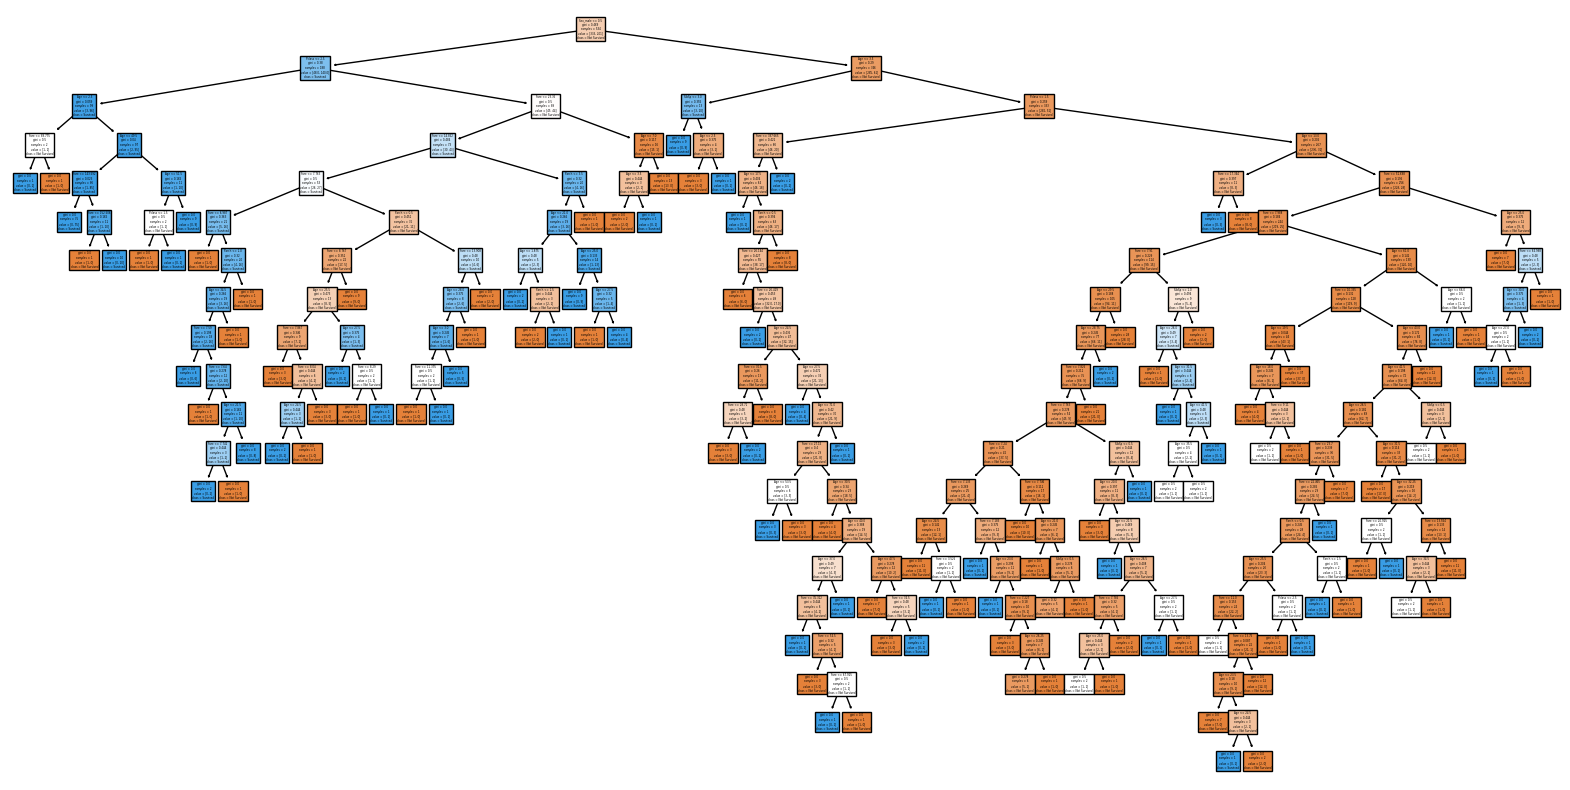

In [89]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Training my decision tree
deci_model = DecisionTreeClassifier(random_state=42)
deci_model.fit(X_train, y_train)

# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(deci_model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()


In [90]:
from sklearn.metrics import accuracy_score

# Predict on the development set
y_dev_pred = deci_model.predict(X_dev)

# Compute accuracy
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print(f"Development Set Accuracy: {dev_accuracy:.4f}")


Development Set Accuracy: 0.7472


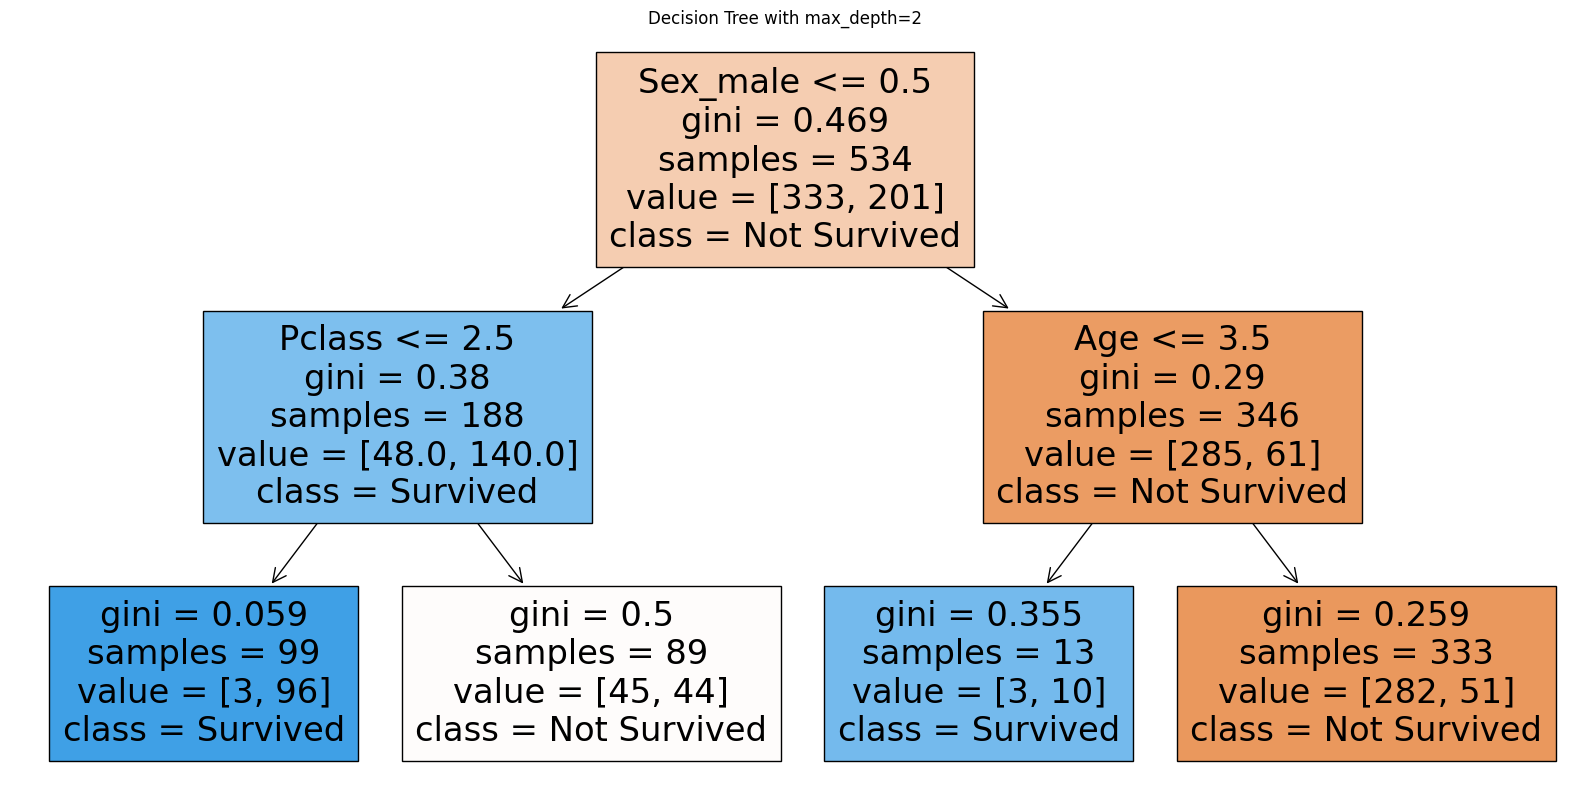

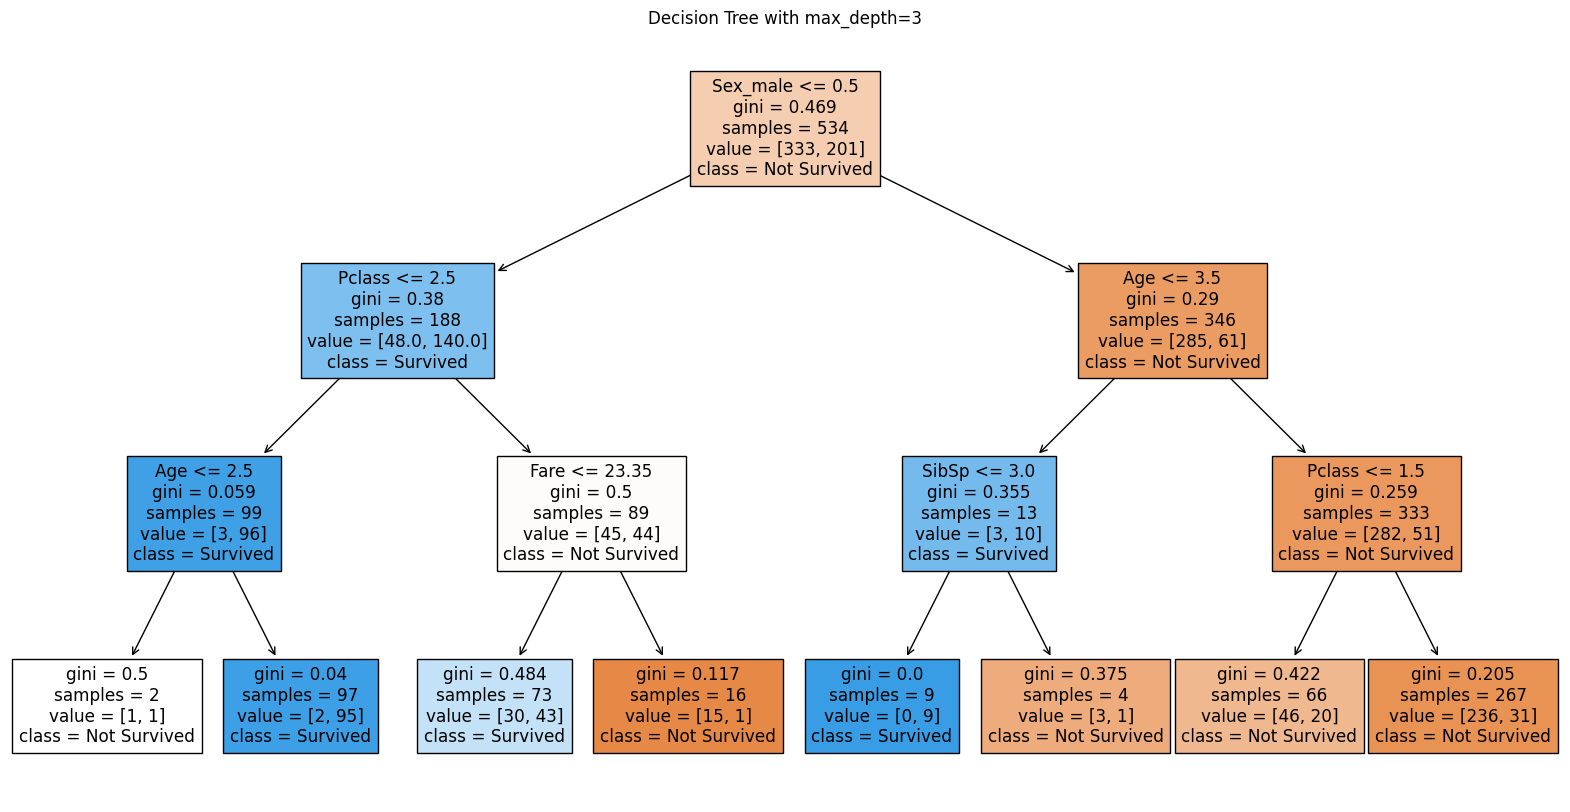

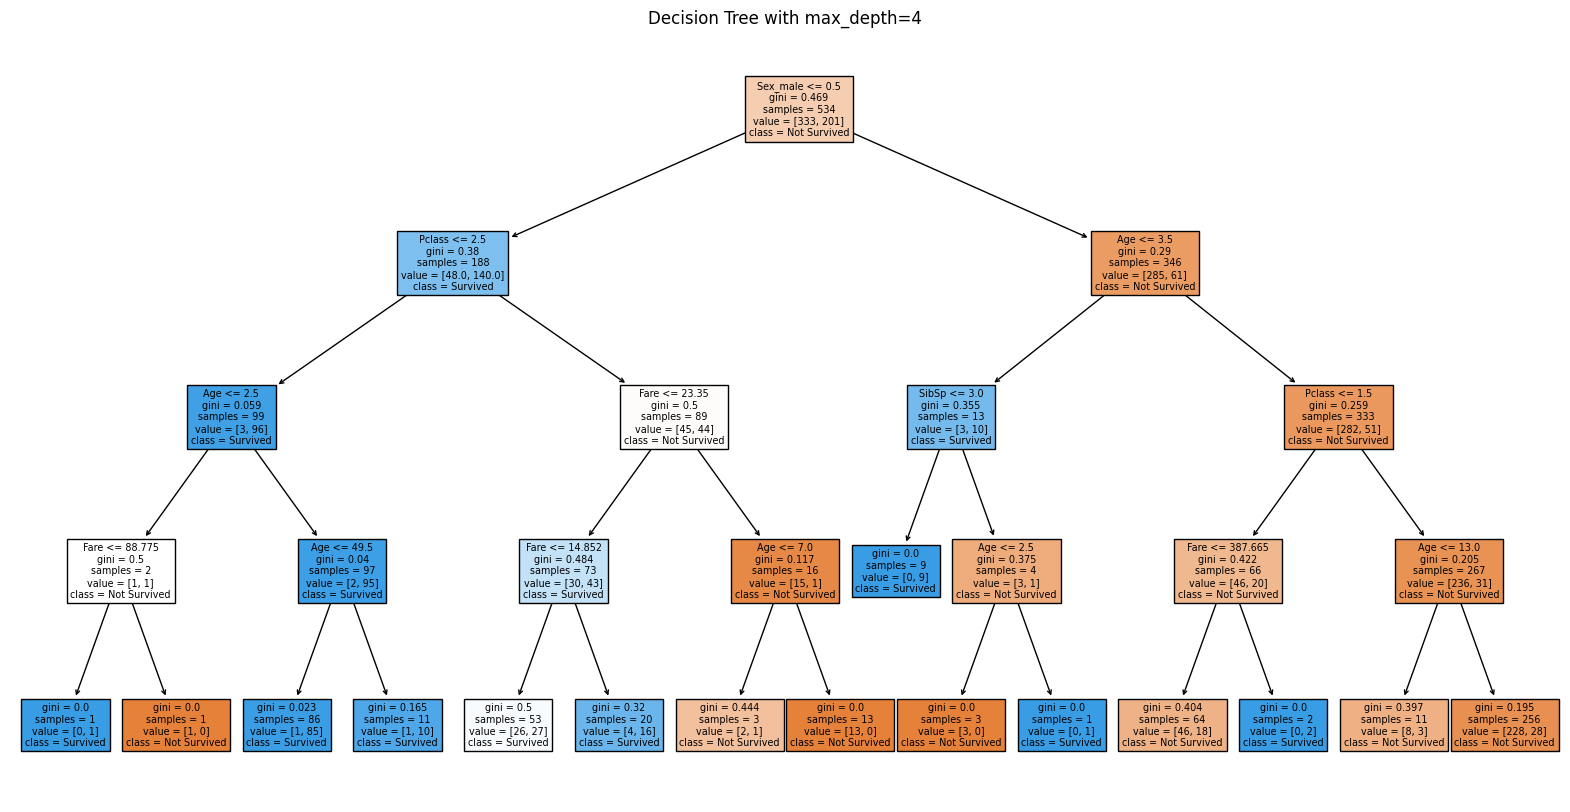

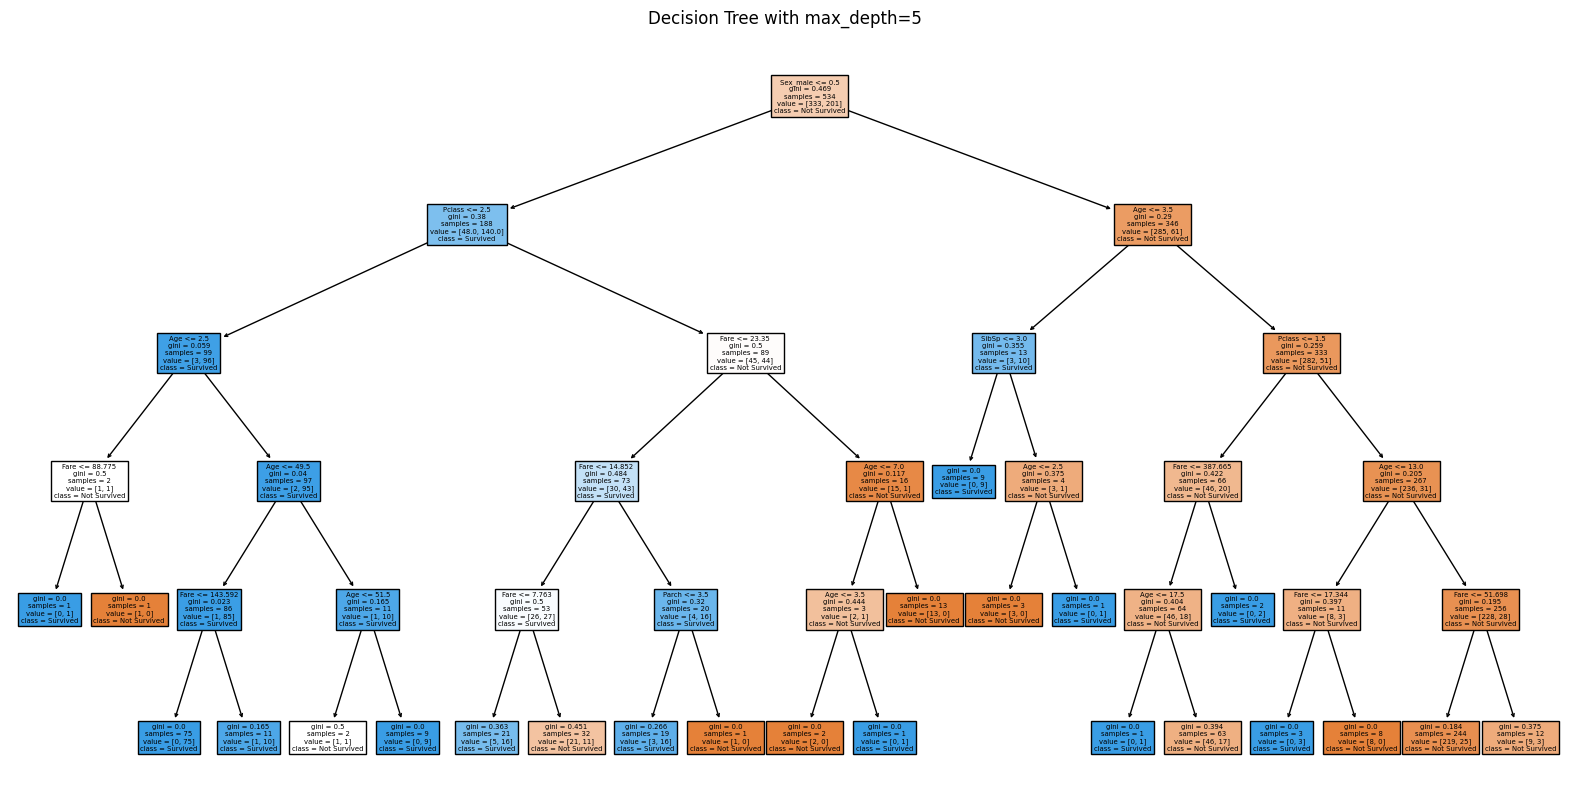

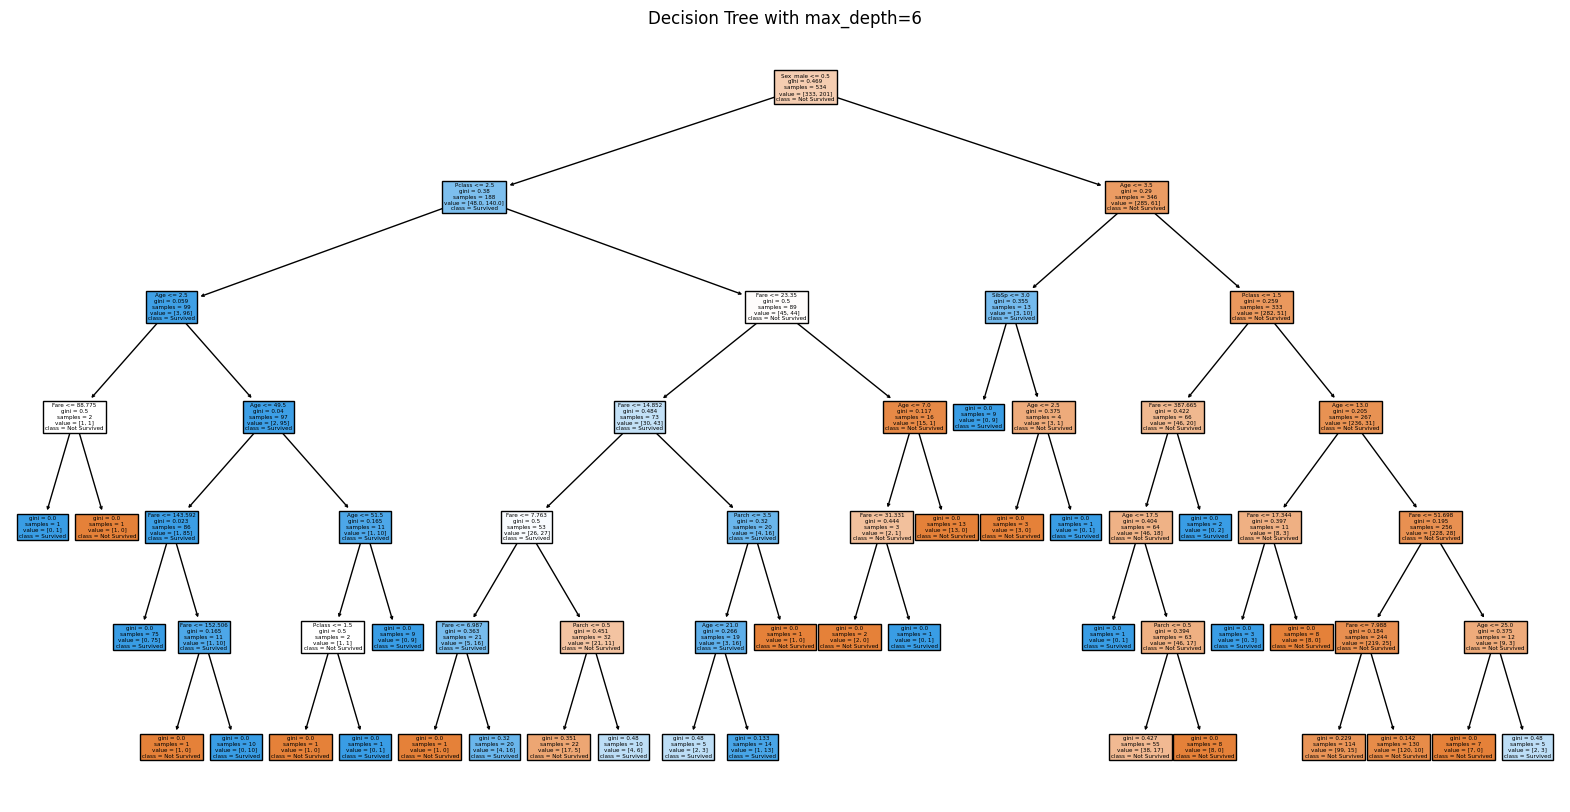

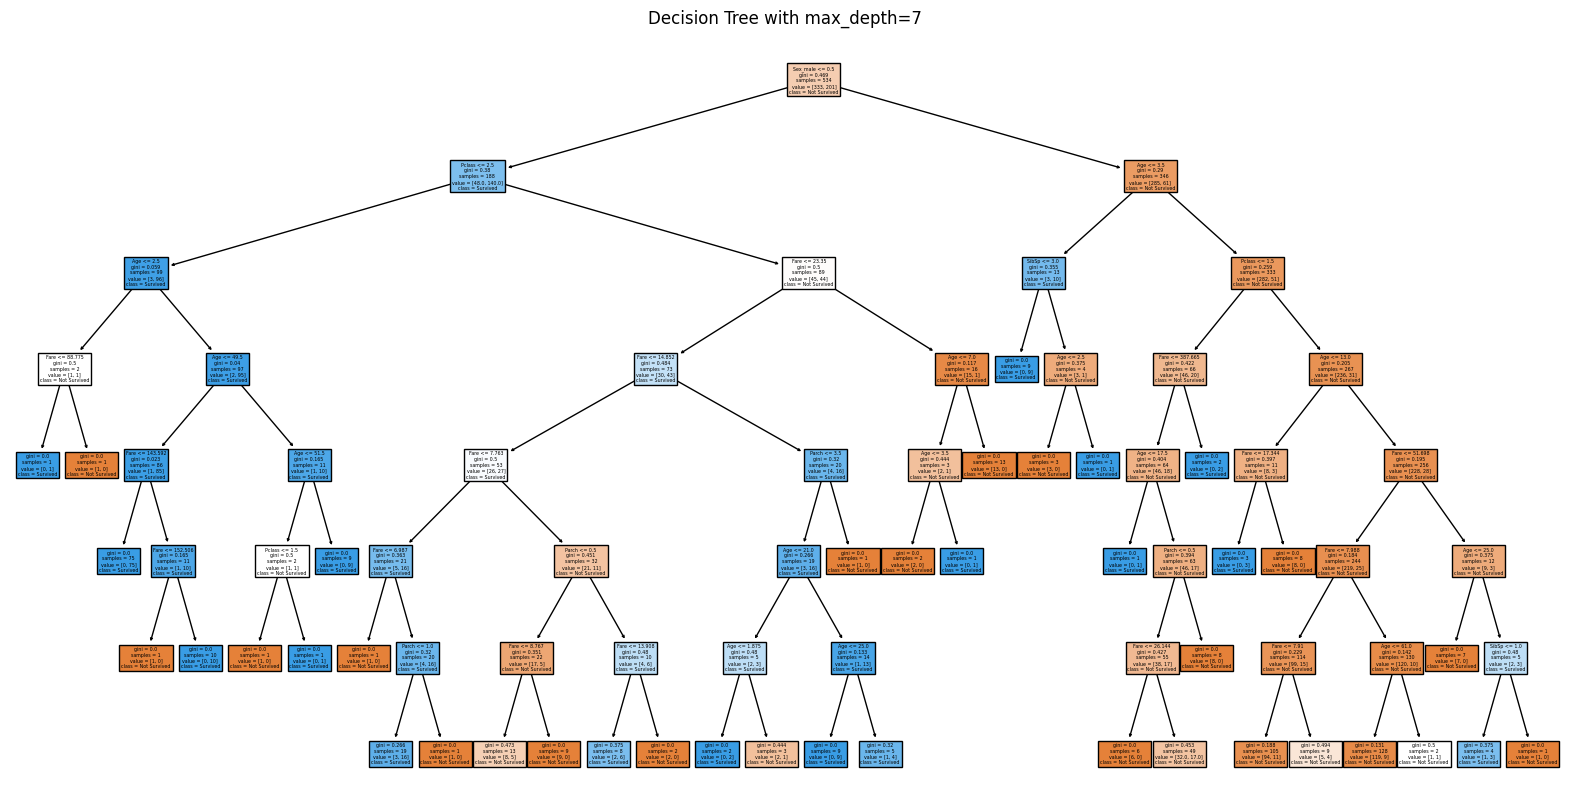

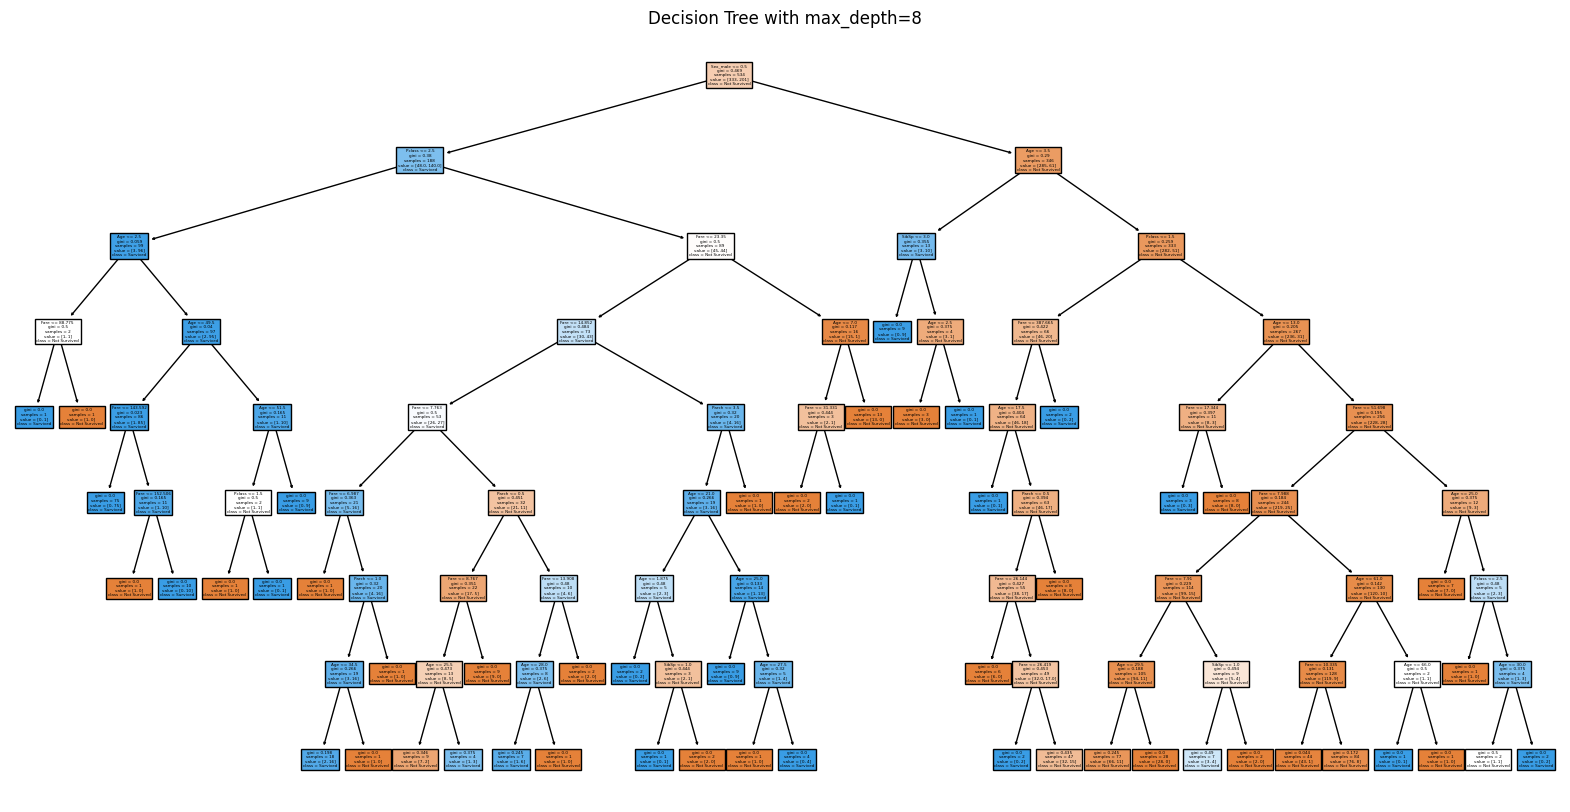

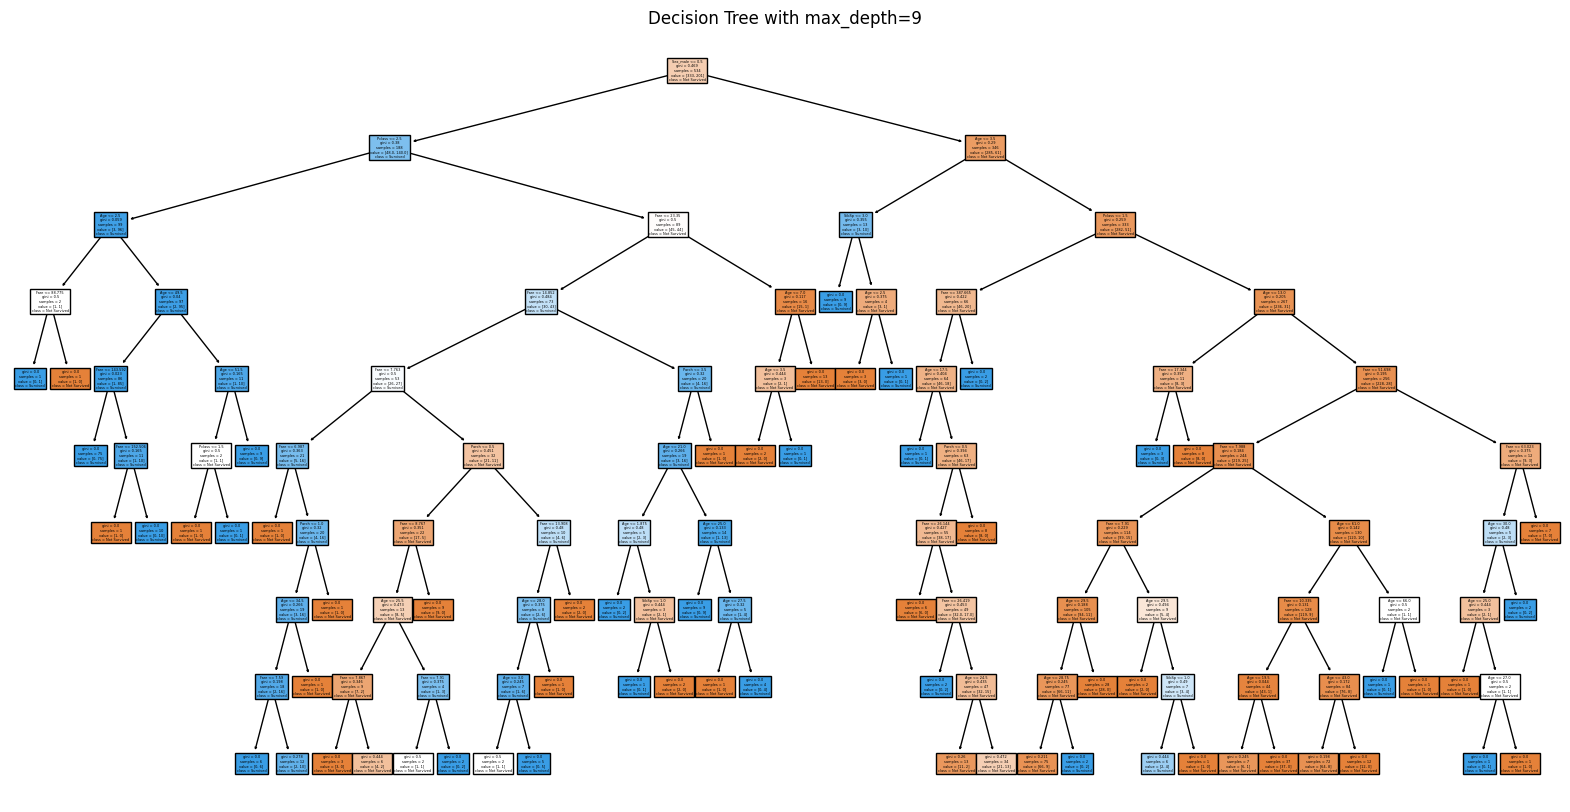

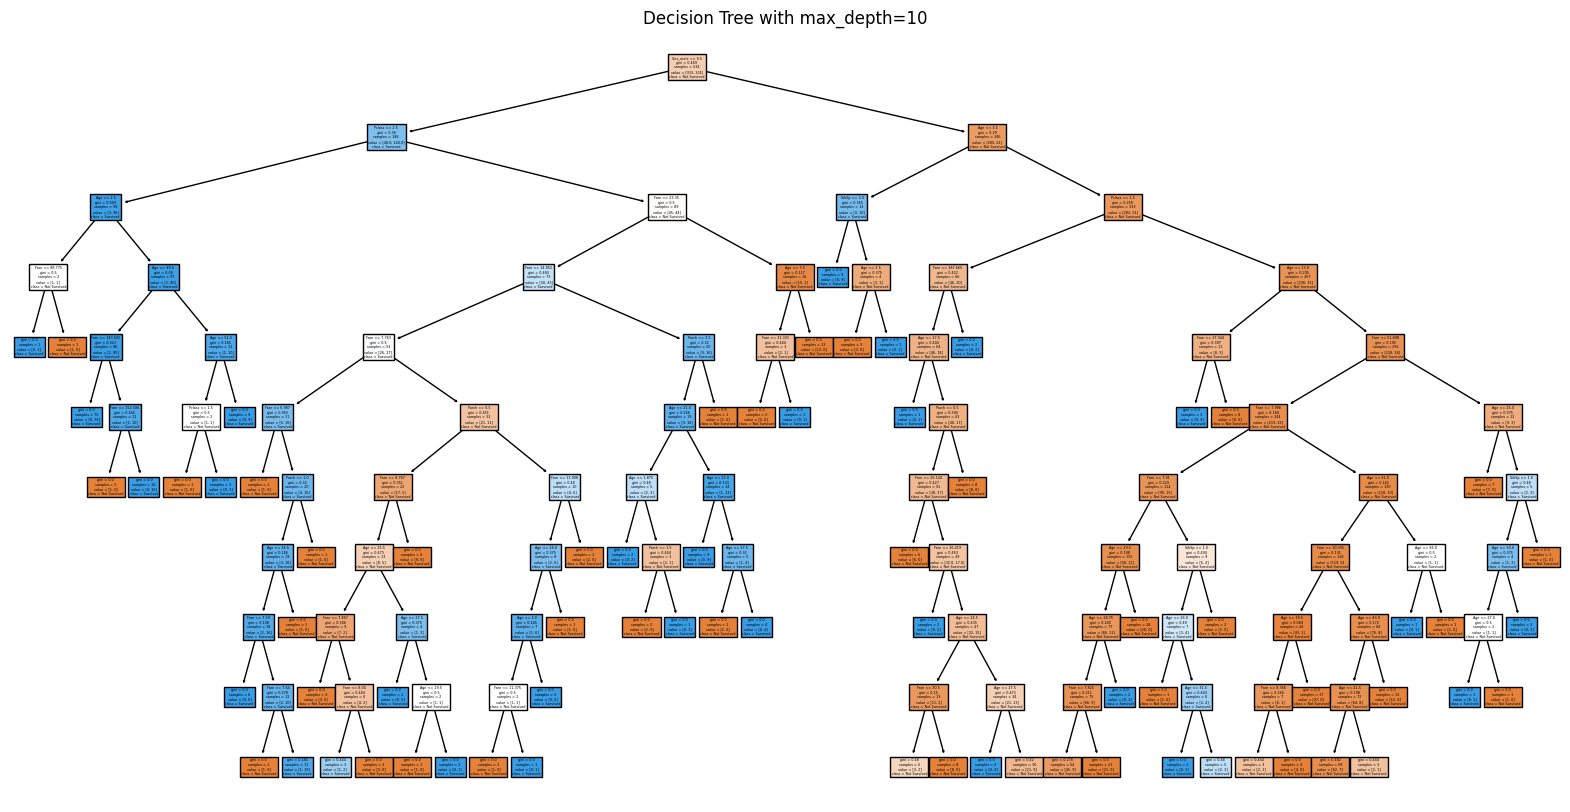

In [91]:
train_accuracies = []
dev_accuracies = []
depths = range(2, 11)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    dev_accuracy = accuracy_score(y_dev, model.predict(X_dev))
    
    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)
    
    # Plot the tree
    plt.figure(figsize=(20,10))
    plot_tree(model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
    plt.title(f"Decision Tree with max_depth={depth}")
    plt.show()


In [92]:
#train_accuracies 
dev_accuracies 

[0.7640449438202247,
 0.7752808988764045,
 0.7752808988764045,
 0.7752808988764045,
 0.7752808988764045,
 0.7752808988764045,
 0.7640449438202247,
 0.7640449438202247,
 0.7640449438202247]

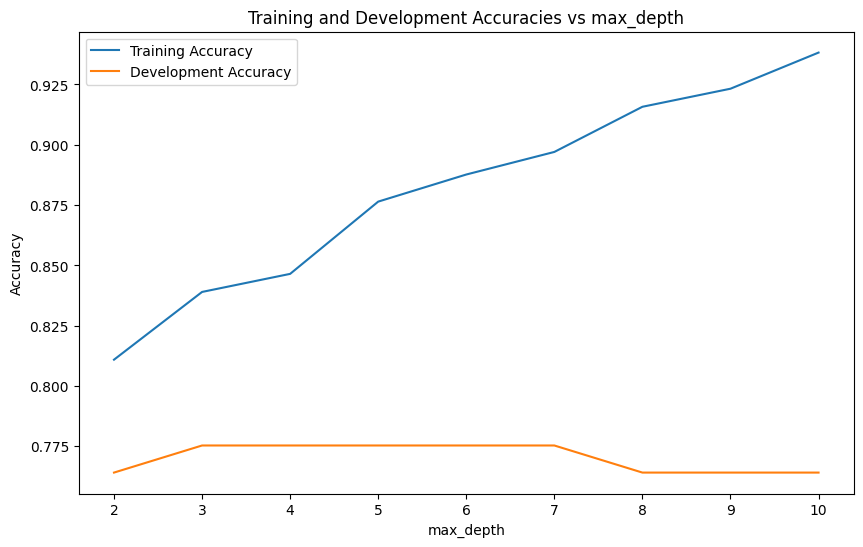

In [93]:
# Plotting training and development accuracies
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, dev_accuracies, label='Development Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Development Accuracies vs max_depth')
plt.show()

Report: From this plot it is evident that the best max depth is 3, it is at the highest point of the plot just before the line bends.

In [94]:
#building our final model bearing in mind that 3 was our best max depth
final_model = DecisionTreeClassifier(max_depth=3, random_state=42)
final_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = final_model.predict(X_test)

# Compute accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.4f}")


Test Set Accuracy: 0.8212


Random forest task

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


Bagging classifier

In [96]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Bagging Classifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

bagging_accuracy




0.7988826815642458

Random forest classifier

In [97]:
# Training a Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)

random_forest_accuracy

0.8212290502793296

Boosting classifier 

In [98]:
boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)
boosting_accuracy = accuracy_score(y_test, boosting_pred)

boosting_accuracy

0.8156424581005587

In [99]:
feature_importances = random_forest_model.feature_importances_
important_feature = X.columns[feature_importances.argmax()]


important_feature


'Fare'

From the rand forest it can be said that "Fare" played an important role to surving of passengers on the titanic.

Parameter tuning and choice of model is gradient boosting classifier.

In [100]:
# Tuning  the parameters for Gradient Boosting
param_grid = {
    'n_estimators': [50,200, 250],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_model_accuracy = accuracy_score(y_test, best_model.predict(X_test))

best_model

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [101]:
best_params

{'max_depth': 3, 'n_estimators': 200}

In [102]:
best_model_accuracy

0.8324022346368715

Reporting accuracies

In [103]:
# Report the accuracies
print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")
print(f"Random Forest Classifier Accuracy: {random_forest_accuracy:.4f}")
print(f"Gradient Boosting Classifier Accuracy: {boosting_accuracy:.4f}")
print(f"Best Gradient Boosting Classifier Accuracy: {best_model_accuracy:.4f}")
print(f"Best Gradient Boosting Parameters: {best_params}")
print(f"Most Important Feature in Random Forest: {important_feature}")


Bagging Classifier Accuracy: 0.7989
Random Forest Classifier Accuracy: 0.8212
Gradient Boosting Classifier Accuracy: 0.8156
Best Gradient Boosting Classifier Accuracy: 0.8324
Best Gradient Boosting Parameters: {'max_depth': 3, 'n_estimators': 200}
Most Important Feature in Random Forest: Fare
